In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
#General Options go here:
pd.options.display.max_columns=None
datafolder = "Data" # If you want to put everything into the working directory, set datafolder to ""
save_to_parquet = True
create_subsets = True

In [7]:
val_features_and_labels = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "enaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "enaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager"]

all_features_and_labels = val_features_and_labels + ["reply_timestamp" ,"retweet_timestamp" ,"retweet_with_comment_timestamp",\
                                                     "like_timestamp" ]

In [8]:
training = pd.read_csv(os.path.join(datafolder,'training.tsv'), sep='\x01',header=None,encoding = 'utf-8',names=all_features_and_labels)
val = pd.read_csv(os.path.join(datafolder,'val.tsv'), sep='\x01',header=None,encoding = 'utf-8',names=all_features_and_labels)

In [9]:
if create_subsets:
    TRAIN_SUBSET_SIZE = 14000000 #140m
    VAL_SUBSET_SIZE = (int)(TRAIN_SUBSET_SIZE / 10)
    print("{} and {} sizes done".format(TRAIN_SUBSET_SIZE, VAL_SUBSET_SIZE))
    
    train_14m = training.sample(n=TRAIN_SUBSET_SIZE, replace=False, random_state=777)
    print("sampeling training done")
    train_14m.to_parquet(os.path.join(datafolder, 'train_14m.parquet'))
    print("saving training.parquet done")
    train_14m.to_csv(os.path.join(datafolder, 'train_14m.tsv'), sep = '\x01',header=None,encoding = 'utf-8')
    print("saving training.tsv done")
    
    val_1400k = val.sample(n=VAL_SUBSET_SIZE, replace=False, random_state=777)
    print("sampeling val done")
    val_1400k.to_parquet(os.path.join(datafolder, 'val_1400k.parquet'))
    print("saving val.parquet done")
    val_1400k.to_csv(os.path.join(datafolder, 'val_1400k.tsv'), sep = '\x01',header=None,encoding = 'utf-8')
    print("saving val.tsv done")

14000000 and 1400000 sizes done
sampeling training done
saving training.parquet done
saving training.tsv done
sampeling val done
saving val.parquet done
saving val.tsv done


In [10]:
#creating a small subsampled data for development purposes containing just 10000 rows for fast operation
dataset = pd.read_csv(os.path.join(datafolder,'sample_first10000.tsv'), sep='\x01',header=None,encoding = 'utf-8',names=all_features_and_labels)

In [11]:
dataset.columns

Index(['text_tokens', 'hashtags', 'tweet_id', 'present_media', 'present_links',
       'present_domains', 'tweet_type', 'language', 'tweet_timestamp',
       'enaged_with_user_id', 'engaged_with_user_follower_count',
       'engaged_with_user_following_count', 'engaged_with_user_is_verified',
       'engaged_with_user_account_creation', 'enaging_user_id',
       'enaging_user_follower_count', 'enaging_user_following_count',
       'enaging_user_is_verified', 'enaging_user_account_creation',
       'engagee_follows_engager', 'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp'],
      dtype='object')

In [8]:
dataset.head(2)

text_tokens  \
0  101\t12469\t10635\t177\t171\t46714\t11850\t105...   
1  101\t1894\t47271\t11369\t82791\t39675\t34065\t...   

                                            hashtags  \
0                                                NaN   
1  A3D61C03DBCE2F920350379414E0048B\t867E9AB76EFF...   

                           tweet_id present_media present_links  \
0  55AB73C0BD989BE2027D300B5DB99786           NaN           NaN   
1  29083D10151BD72E2459635EA38AC8B3         Photo           NaN   

  present_domains tweet_type                          language  \
0             NaN   TopLevel  D3164C7FBCF2565DDF915B1B3AEFB1DC   
1             NaN   TopLevel  22C448FF81263D4BAF2A176145EE9EAD   

   tweet_timestamp               enaged_with_user_id  \
0       1581106126  D93672332C653D3F09E15DDA3DE98C53   
1       1581472519  DA64544DF9826E9F284F4FF6CE624F7A   

   engaged_with_user_follower_count  engaged_with_user_following_count  \
0                            611665                                649   
1                             11005                              10795   

   engaged_with_user_is_verified  engaged_with_user_account_creation  \
0                           True                          1263683885   
1                          False                          1437797708   

                    enaging_user_id  enaging_user_follower_count  \
0  000001CA3DF6FD4C4D381268710EF3B8                          420   
1  00000523D726C61D483CC9AF99C69FF7                            4   

   enaging_user_following_count  enaging_user_is_verified  \
0                           518                     False   
1                             6                     False   

   enaging_user_account_creation  engagee_follows_engager  reply_timestamp  \
0                     1315240929                    False              NaN   
1                     1568940527                     True              NaN   

   retweet_timestamp  retweet_with_comment_timestamp  like_timestamp  
0                NaN                             NaN             NaN  
1                NaN                             NaN             NaN

In [9]:
# https://stackoverflow.com/questions/50604133/convert-csv-to-parquet-file-using-python
if save_to_parquet:
    training.to_parquet(os.path.join(datafolder, 'training.parquet'))
    val.to_parquet(os.path.join(datafolder, 'val.parquet'))
    dataset.to_parquet(os.path.join(datafolder, 'sample_first10000.parquet'))

In [10]:
#dataset.replace(np.nan,None,inplace=True)
#dataset.replace('NaN',None,inplace=True)

In [11]:
def run_statistic(dataframe, fixed_attribute=None):    
   
    total_number_rows=len(dataframe)
    
    #reply_count=total_number_rows-np.sum(pd.isnull(dataframe['reply_timestamp']))
    #retweet_count=total_number_rows-np.sum(pd.isnull(dataframe['retweet_timestamp']))
    #retweet_with_comment_count=total_number_rows-np.sum(pd.isnull(dataframe['retweet_with_comment_timestamp']))
    #like_count=total_number_rows-np.sum(pd.isnull(dataframe['like_timestamp']))
    #print(reply_count,retweet_count,retweet_with_comment_count,like_count)  

    label_names=["reply_timestamp" ,"retweet_timestamp" ,"retweet_with_comment_timestamp", "like_timestamp"] 
    #uncomment if you do not want 1d counts
    label_names_2dtuple=[(i,j) for i in label_names for j in label_names]# if i != j]
   
    if fixed_attribute is None:
      
        counts_2d={}
        for tuple2d in label_names_2dtuple:
            #print("currently computing tuple ",tuple2d)
            counts_2d[tuple2d]=(total_number_rows-np.sum((pd.isnull(dataframe[tuple2d[0]]) | pd.isnull(dataframe[tuple2d[1]]))))/total_number_rows

        return(counts_2d)

    else:
       
        #a dict of dicts holding the dictionaries for all the different values that we iterate
        counts_dict={}

        for value in dataframe[fixed_attribute].unique():
            counts_2d={}
            for tuple2d in label_names_2dtuple:
                total_number_rows_value=sum(dataframe[fixed_attribute]==value)
                counts_2d[tuple2d]=(total_number_rows_value-np.sum(((pd.isnull(dataframe[tuple2d[0]]) | pd.isnull(dataframe[tuple2d[1]]))&(dataframe[fixed_attribute]==value))))/total_number_rows_value
            counts_dict[value]=counts_2d

        return(counts_dict)
#print(run_statistic(dataset))

#print(run_sample_statistic(train_data))
print()
print(run_statistic(dataset,'present_media'))

/home/adbs20/e01528091/.conda/envs/envJovan1/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars


{nan: {('reply_timestamp', 'reply_timestamp'): nan, ('reply_timestamp', 'retweet_timestamp'): nan, ('reply_timestamp', 'retweet_with_comment_timestamp'): nan, ('reply_timestamp', 'like_timestamp'): nan, ('retweet_timestamp', 'reply_timestamp'): nan, ('retweet_timestamp', 'retweet_timestamp'): nan, ('retweet_timestamp', 'retweet_with_comment_timestamp'): nan, ('retweet_timestamp', 'like_timestamp'): nan, ('retweet_with_comment_timestamp', 'reply_timestamp'): nan, ('retweet_with_comment_timestamp', 'retweet_timestamp'): nan, ('retweet_with_comment_timestamp', 'retweet_with_comment_timestamp'): nan, ('retweet_with_comment_timestamp', 'like_timestamp'): nan, ('like_timestamp', 'reply_timestamp'): nan, ('like_timestamp', 'retweet_timestamp'): nan, ('like_timestamp', 'retweet_with_comment_timestamp'): nan, ('like_timestamp', 'like_timestamp'): nan}, 'Photo': {('reply_timestamp', 'reply_timestamp'): 0.026923076923076925, ('reply_timestamp', 'retweet_timestamp'): 0.001098901098901099, ('reply_

Creating Plot for  True


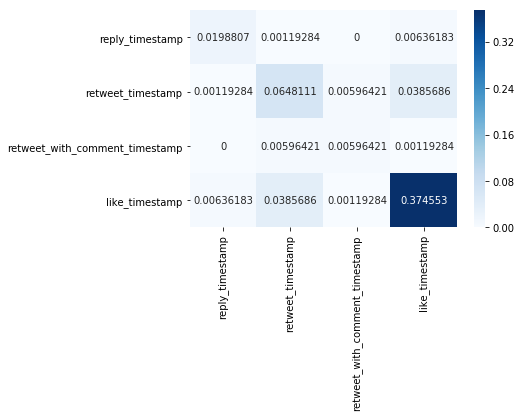

Creating Plot for  False


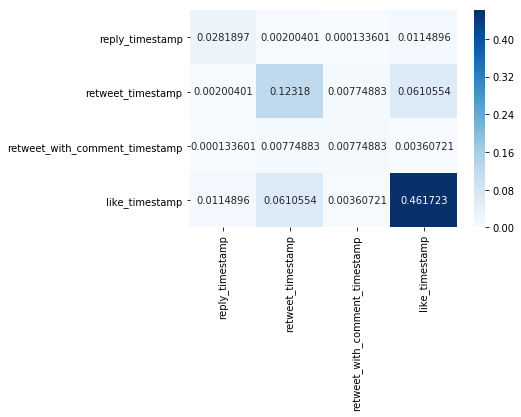

In [11]:
def plot_statistic(statistic_to_plot):
    for criteria in statistic_to_plot.keys():
        df=pd.DataFrame(index=["reply_timestamp" ,"retweet_timestamp" ,"retweet_with_comment_timestamp", "like_timestamp"],columns=["reply_timestamp" ,"retweet_timestamp" ,"retweet_with_comment_timestamp", "like_timestamp"]  )
        for key, value in statistic_to_plot[criteria].items():
            df.loc[key[0]][key[1]]=value
        #print(df)
        #we need to cast the dataframe as int for this to work
        print("Creating Plot for ",criteria)
        sns.heatmap(df.astype('float32'), cmap="Blues", annot=True, fmt='g')
        plt.show()    

plot_statistic(run_statistic(dataset,'engaged_with_user_is_verified'))


Creating plots for  present_media
Creating Plot for  NaN


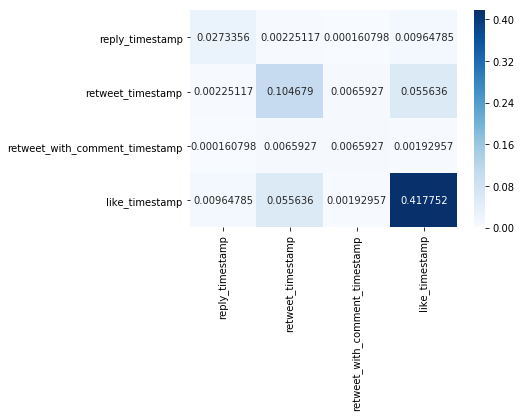

Creating Plot for  Photo


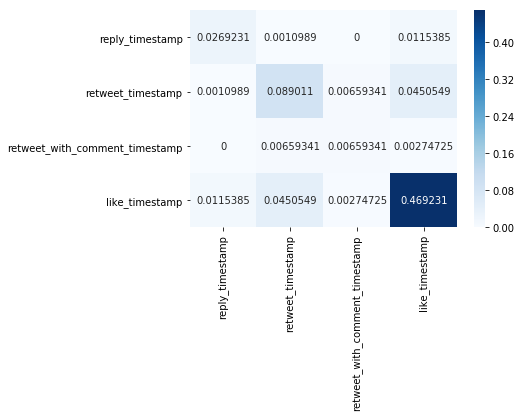

Creating Plot for  Photo	Photo


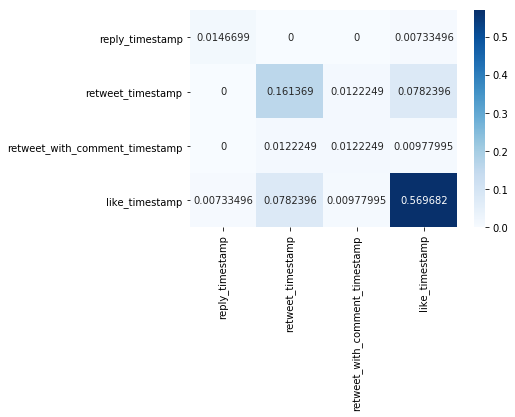

Creating Plot for  Photo	Photo	Photo	Photo


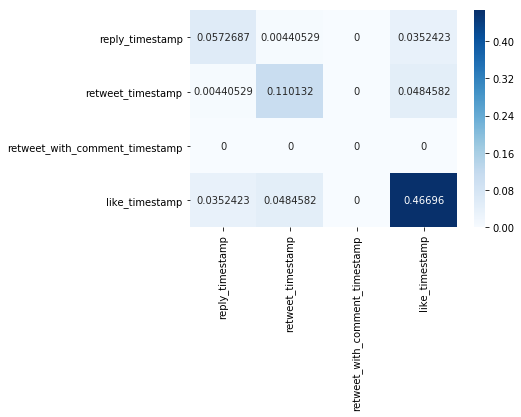

Creating Plot for  Video


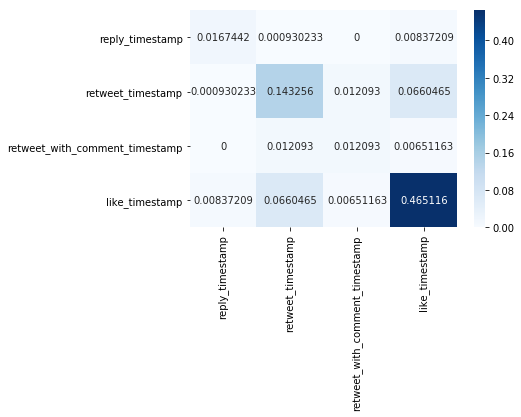

Creating Plot for  Photo	Photo	Photo


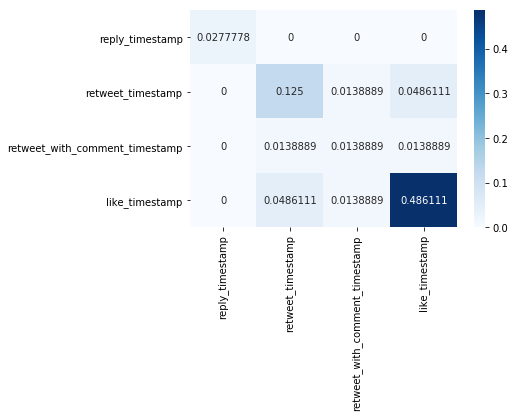

Creating Plot for  GIF


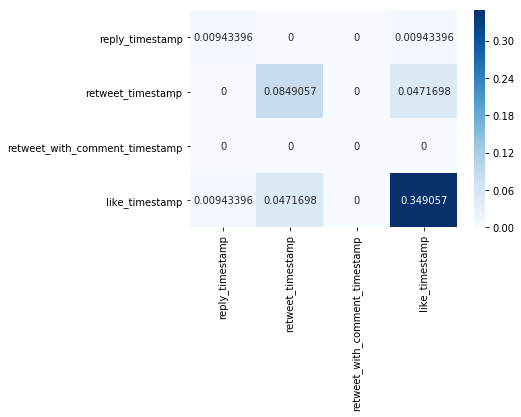

Creating plots for  tweet_type
Creating Plot for  TopLevel


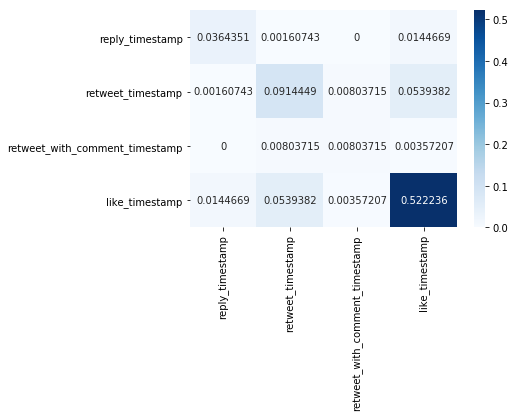

Creating Plot for  Retweet


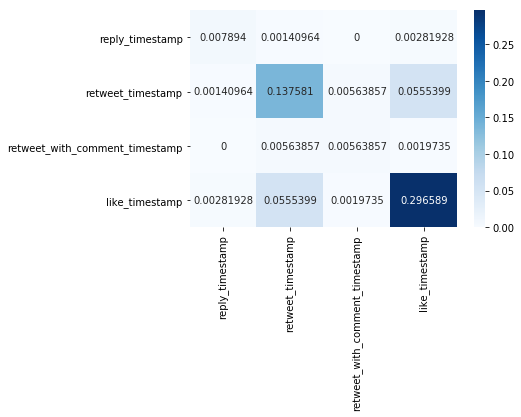

Creating Plot for  Quote


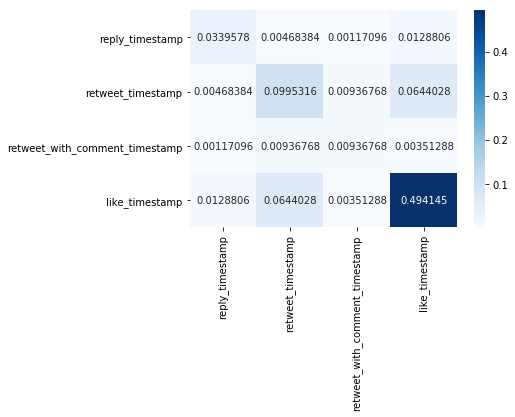

Creating plots for  language
Creating Plot for  D3164C7FBCF2565DDF915B1B3AEFB1DC


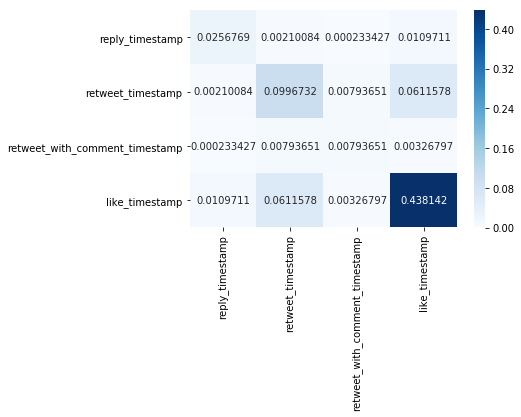

Creating Plot for  22C448FF81263D4BAF2A176145EE9EAD


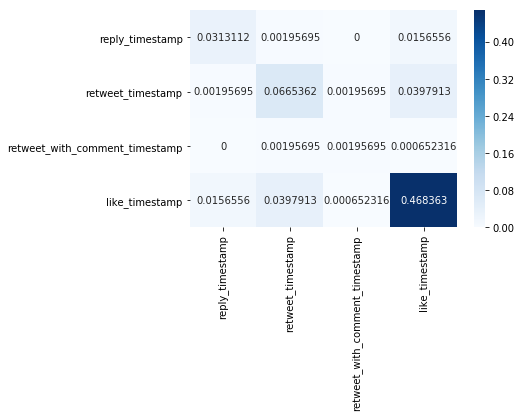

Creating Plot for  B9175601E87101A984A50F8A62A1C374


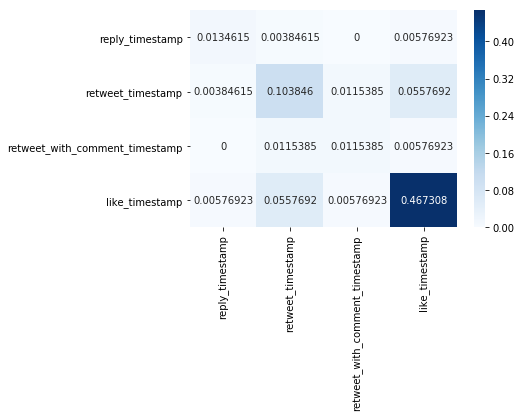

Creating Plot for  ECED8A16BE2A5E8871FD55F4842F16B1


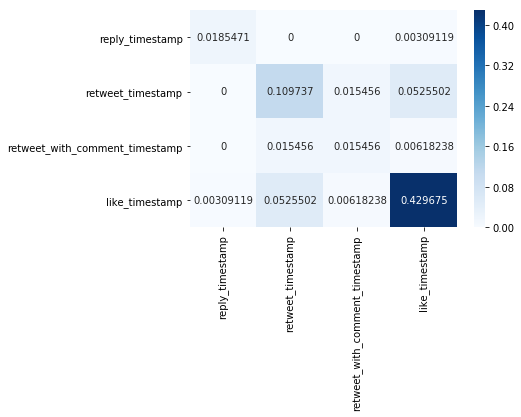

Creating Plot for  06D61DCBBE938971E1EA0C38BD9B5446


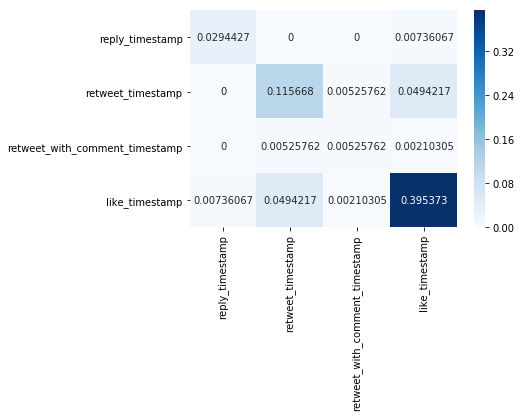

Creating Plot for  125C57F4FA6D4E110983FB11B52EFD4E


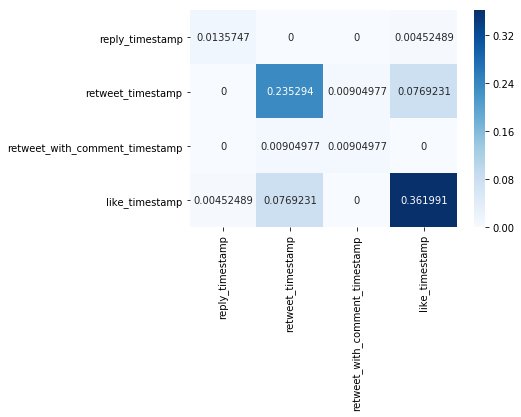

Creating Plot for  9ECD42BC079C20F156F53CB3B99E600E


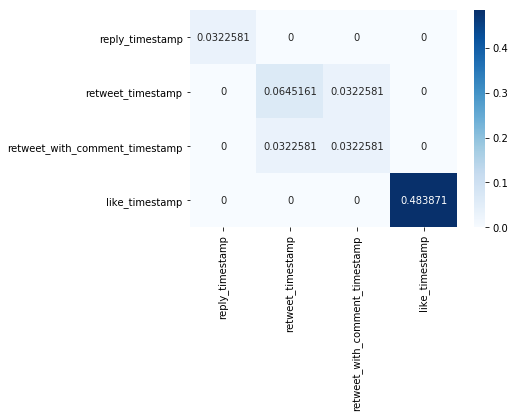

Creating Plot for  9BF3403E0EB7EA8A256DA9019C0B0716


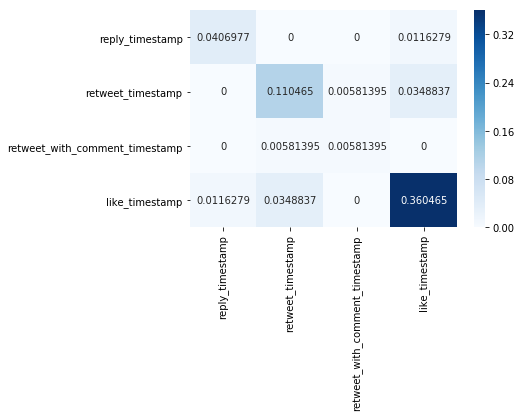

Creating Plot for  717293301FE296B0B61950D041485825


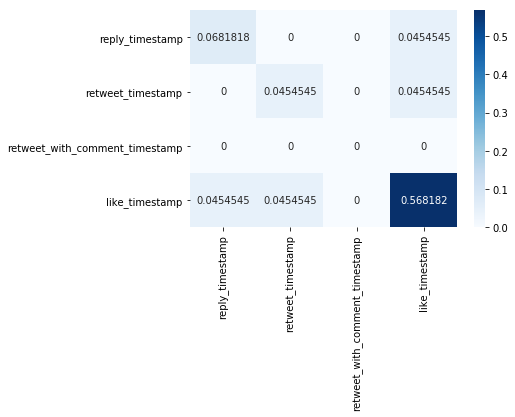

Creating Plot for  2996EB2FE8162C076D070A4C8D6532CD


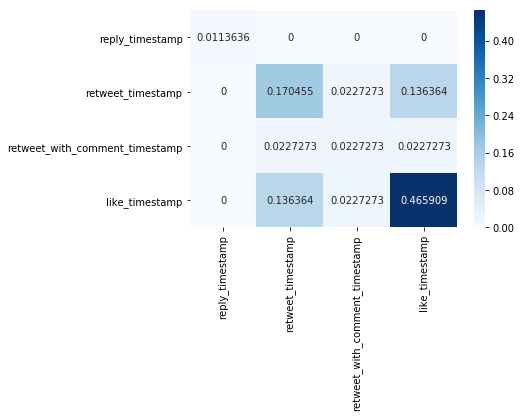

Creating Plot for  167115458A0DBDFF7E9C0C53A83BAC9B


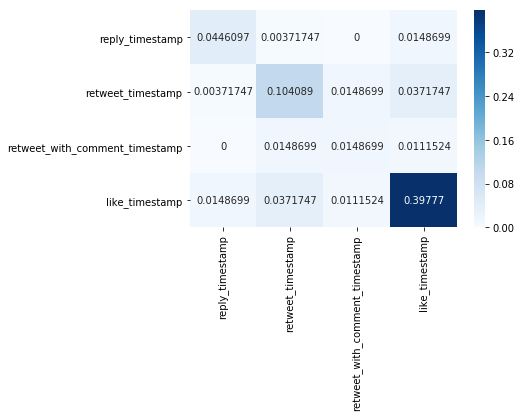

Creating Plot for  4DC22C3F31C5C43721E6B5815A595ED6


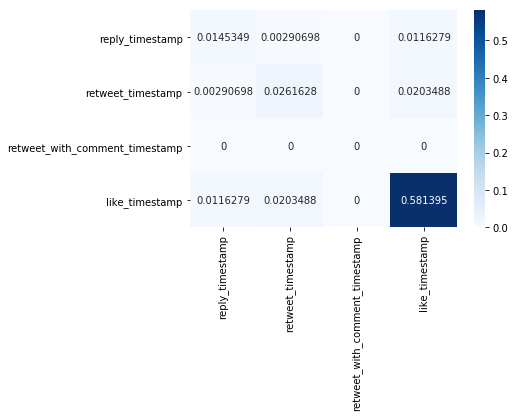

Creating Plot for  FA3F382BC409C271E3D6EAF8BE4648DD


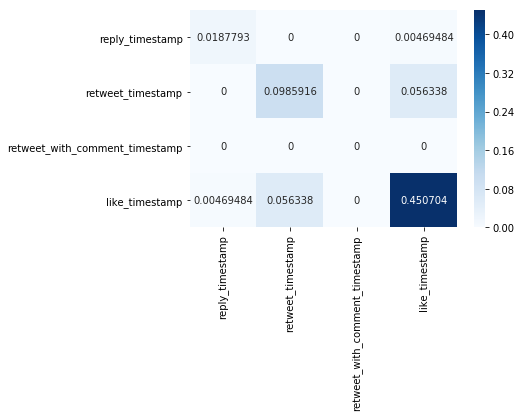

Creating Plot for  D413F5FE5236E5650A46FD983AB39212


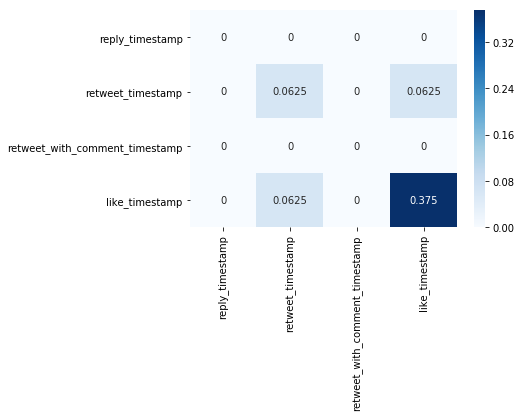

Creating Plot for  CB11E9CF42BD0A1BAD5E27BF3422D99D


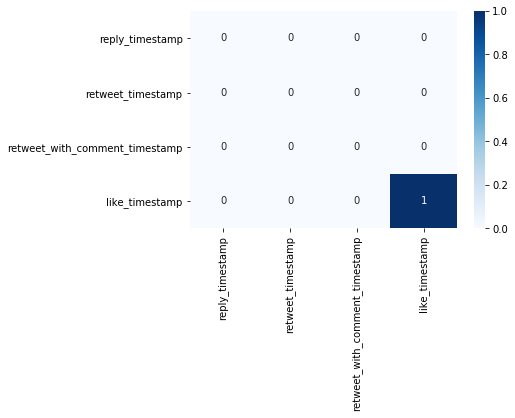

Creating Plot for  6431A618DCF7F4CB7F62A95A39BAB77A


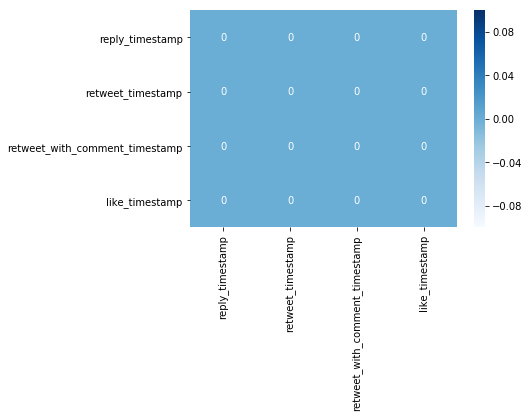

Creating Plot for  975B38F44D65EE42A547283787FF5A21


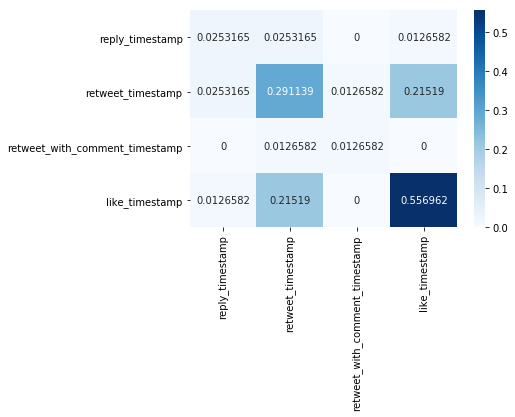

Creating Plot for  3820C29CBCA409A33BADF68852057C4A


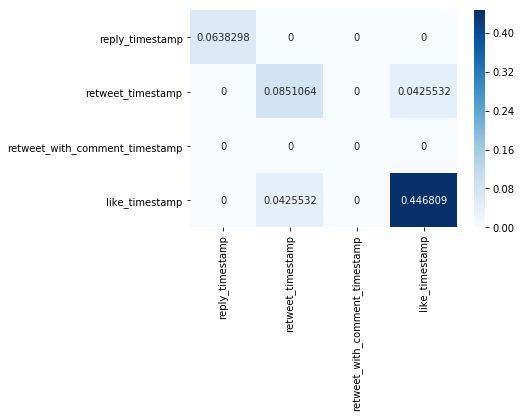

Creating Plot for  76B8A9C3013AE6414A3E6012413CDC3B


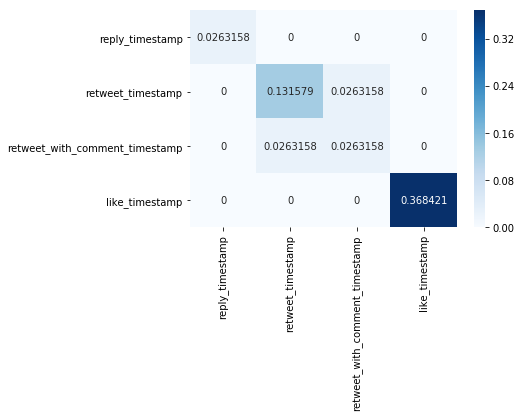

Creating Plot for  0331BF70E606D62D92C96CE9AD71A7CF


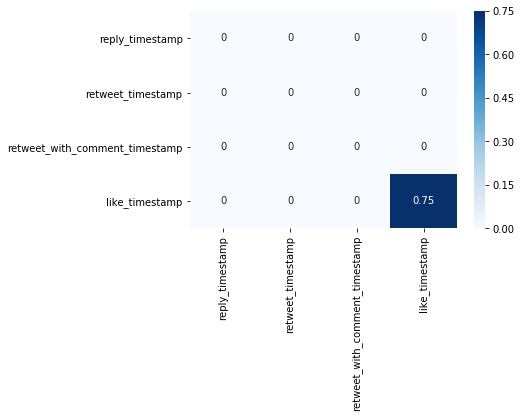

Creating Plot for  FF60A88F53E63000266F8B9149E35AD9


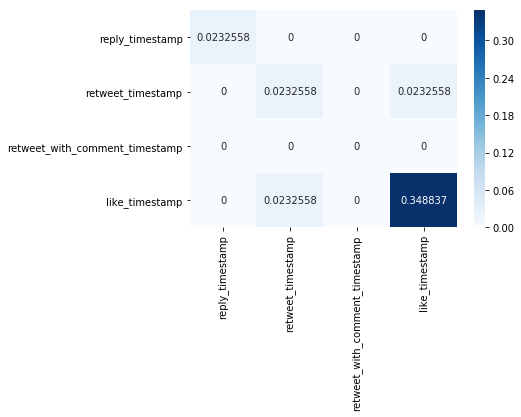

Creating Plot for  022EC308651FACB02794A8147AEE1B78


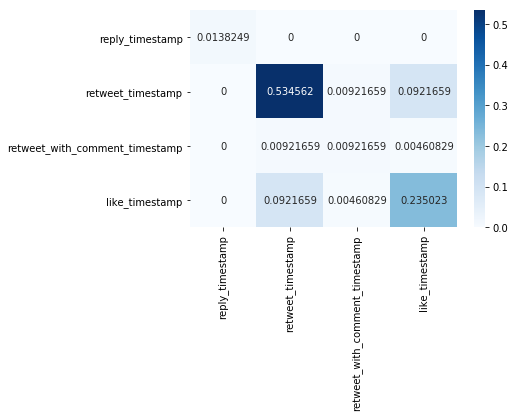

Creating Plot for  A0C7021AD8299ADF0C9EBE326C115F6F


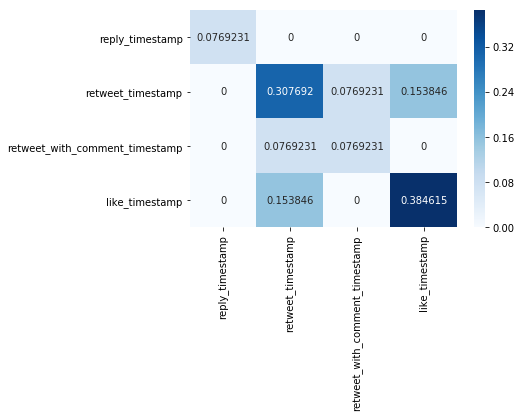

Creating Plot for  1FFD2FE4297F5E70EBC6C3230D95CB9C


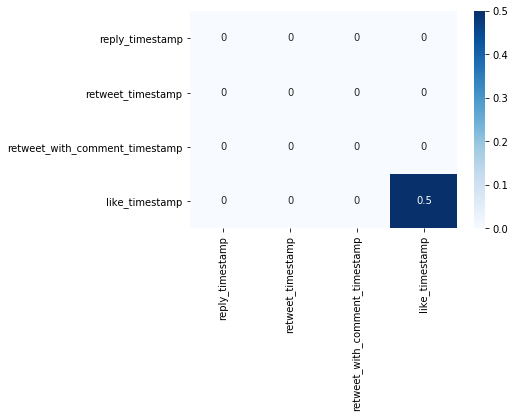

Creating Plot for  AEF22666801F0A5846D853B9CEB2E327


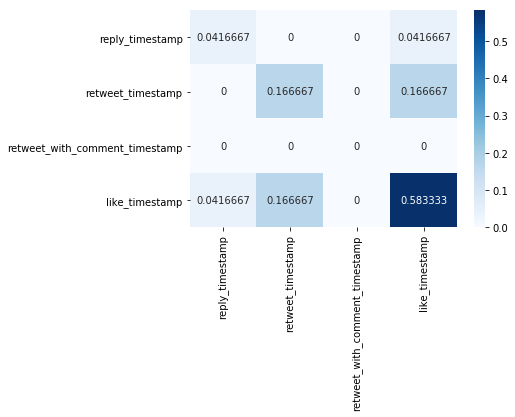

Creating Plot for  06BEAB41D66CCFF329D1ED8BA120A6C2


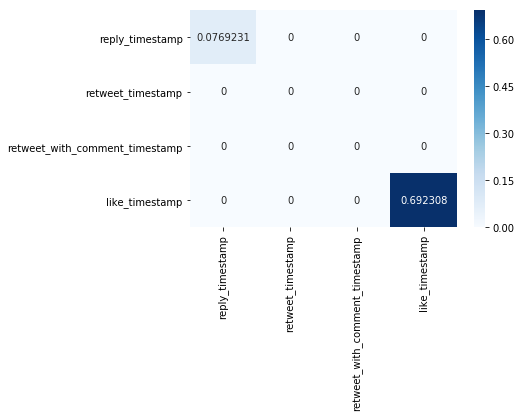

Creating Plot for  C7A400D9AD489ACF673CF12FBB80AAE5


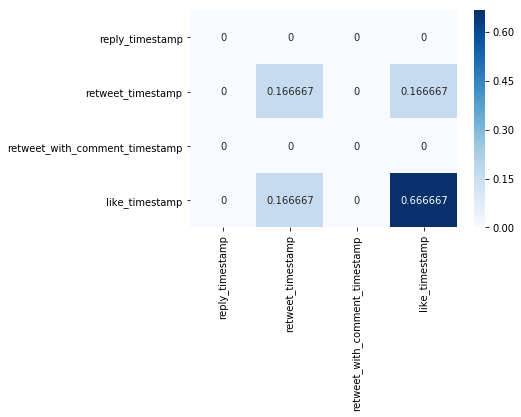

Creating Plot for  4249CE88433AEA3F8DCEECF008B3CB95


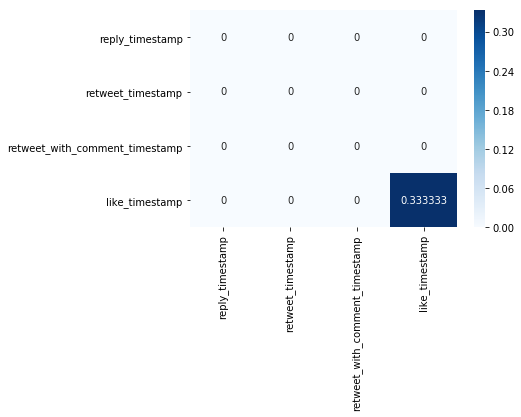

Creating Plot for  190BA7DA361BC06BC1D7E824C378064D


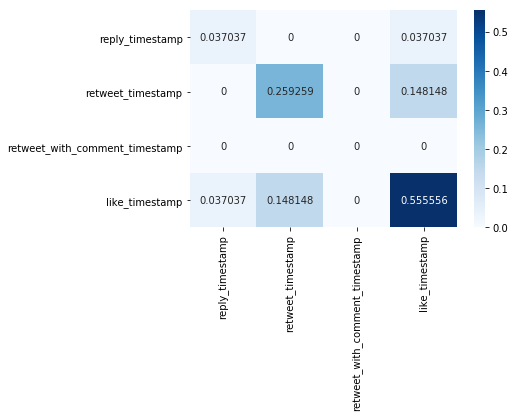

Creating Plot for  920502FAA080485768AA89BC96A55C47


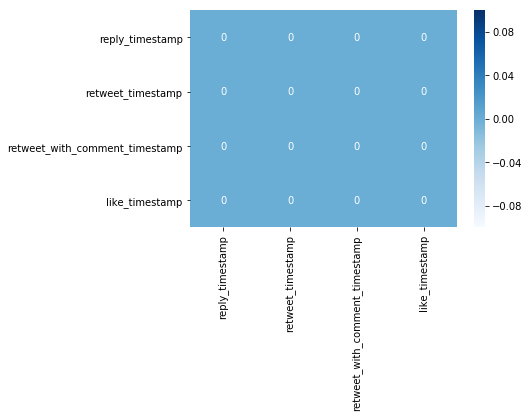

Creating Plot for  DBEEFB80F8A314311E2B4BD593E11DFE


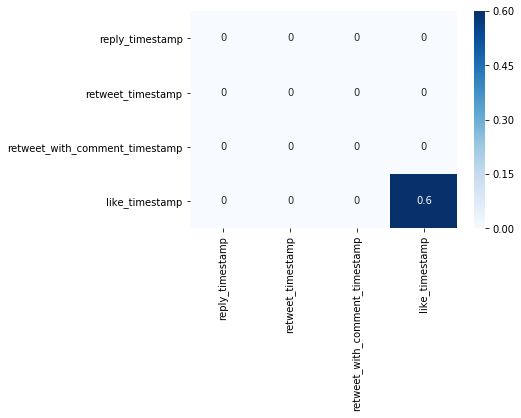

Creating Plot for  3E16B11B7ADE3A22DDFC4423FBCEAD5D


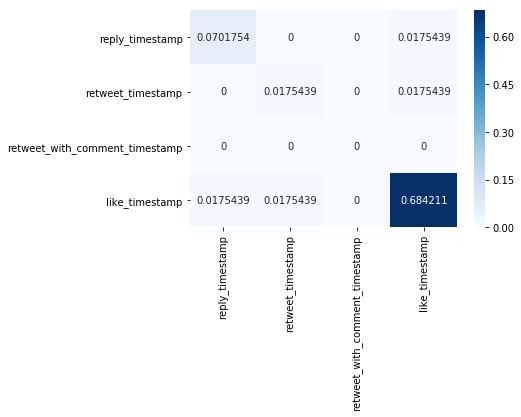

Creating Plot for  89616CFF8EC8637092F885C7EFF43D74


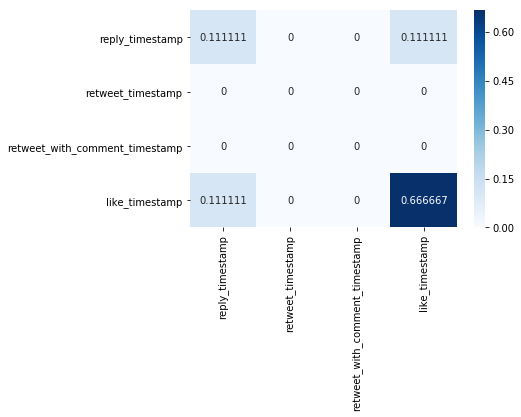

Creating Plot for  48236EC80FDDDFADE99420ABC9210DDF


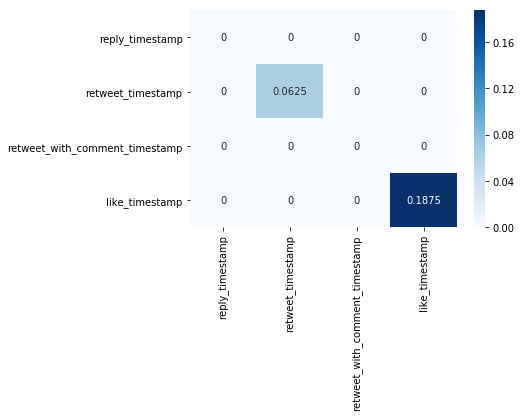

Creating Plot for  E59EF8BB86A6D815331DDF4C467CE0C7


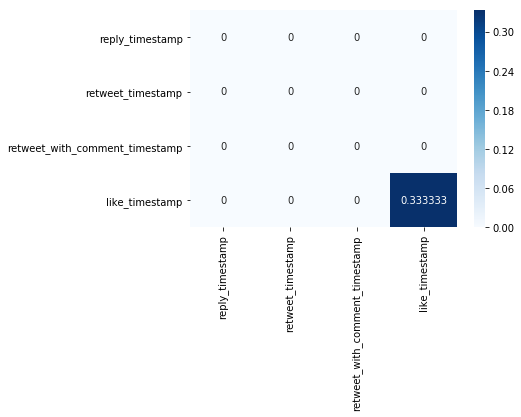

Creating Plot for  FF7EABB5A382356D54D9C41BA0125E09


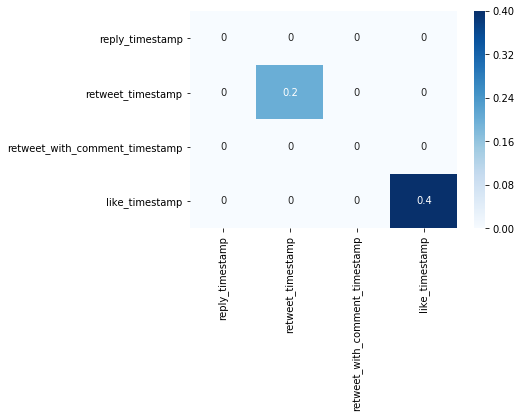

Creating Plot for  691890251F2B9FF922BE6D3699ABEFD2


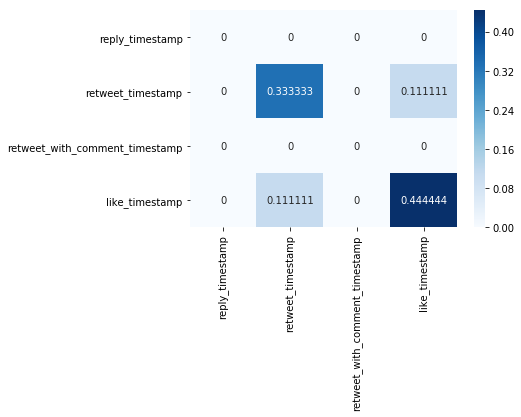

Creating Plot for  1BC639981AE88E09129594B11F894A21


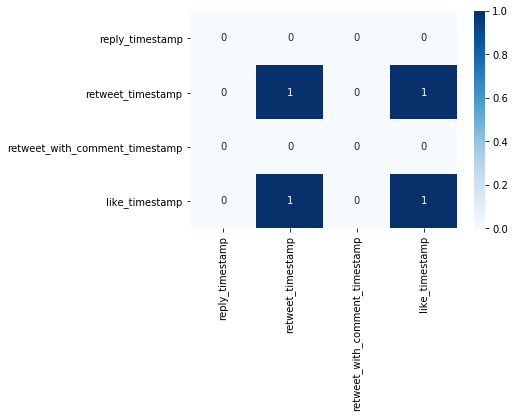

Creating Plot for  3A85BCEC571C3F5AB1069E4924189177


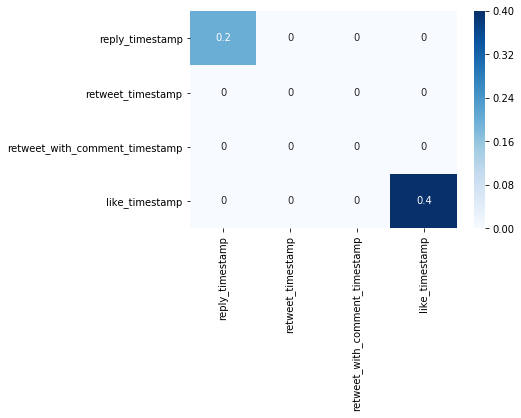

Creating Plot for  AA0254541959271ED3453119B787D0C3


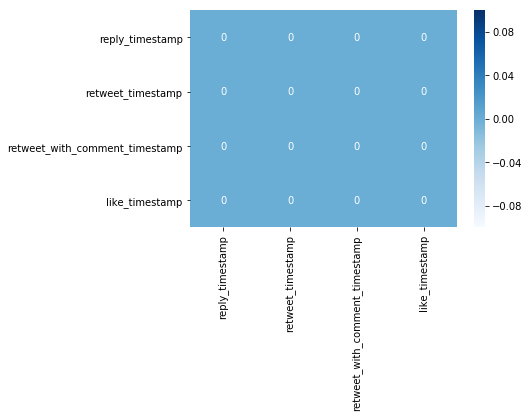

Creating Plot for  A6B70CDF8C7B934D4A218CA9B6B7FDB4


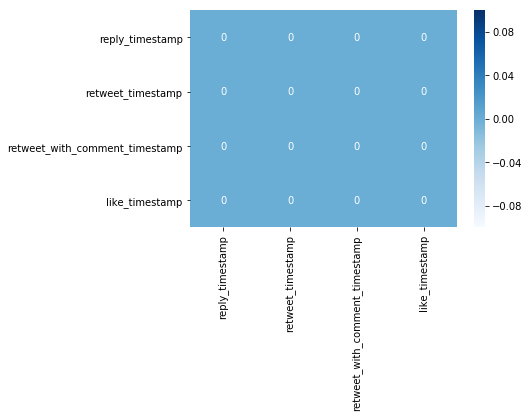

Creating Plot for  259A6F6DFD672CB1F883CBEC01B99F2D


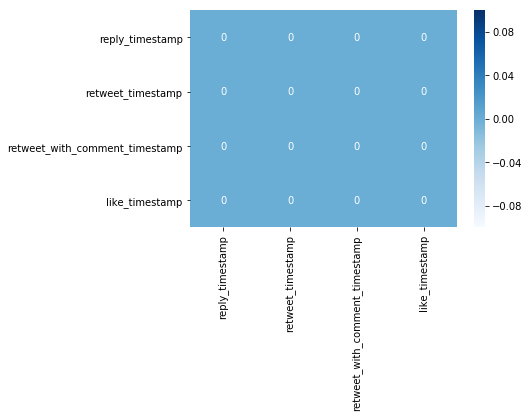

Creating Plot for  E7BB61D2A87C1E72DF1C7BC292B86A1C


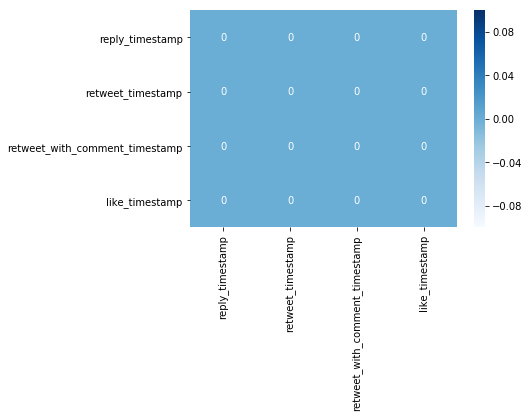

Creating Plot for  B6D90127A09AB1229731898AEF9D4D7C


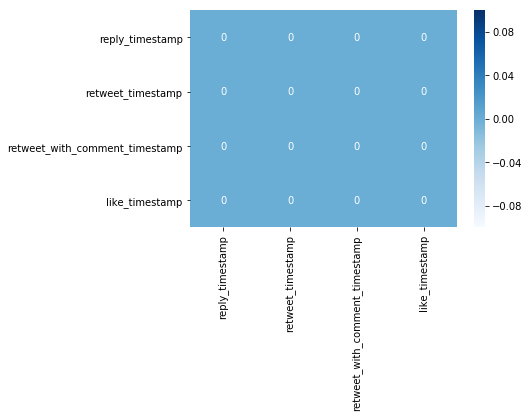

Creating Plot for  F3E1016563360F9434FA986CA86C249C


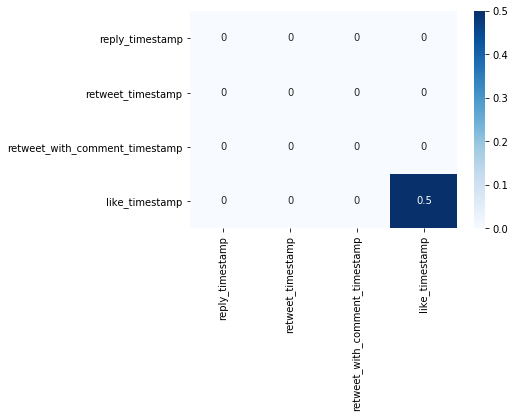

Creating Plot for  3121F7240D488F74EEED9312E174B217


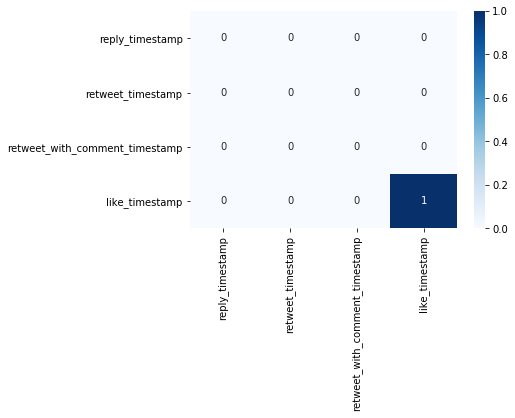

Creating Plot for  60FBA0E834CC59D647C3599AD763FFDF


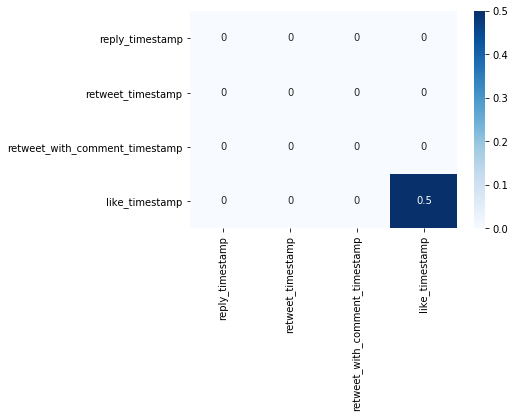

Creating Plot for  F4FD40A716F1572C9A28E9CAA58BE3A5


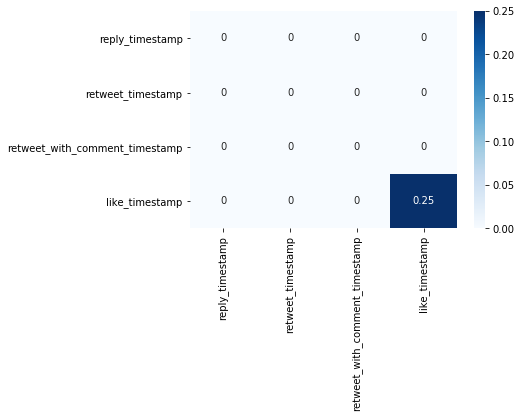

Creating Plot for  57ADD4576E2AD6648E9B2DE32F3462A5


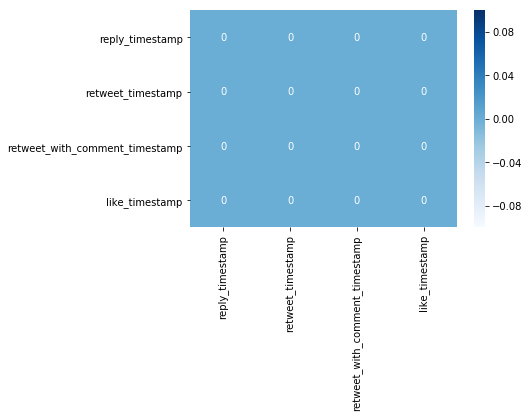

Creating Plot for  69C4A33B9AD29AF883D60BA61CC08702


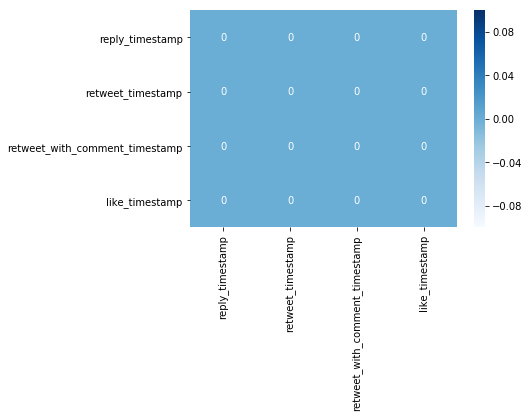

Creating plots for  engaged_with_user_is_verified
Creating Plot for  True


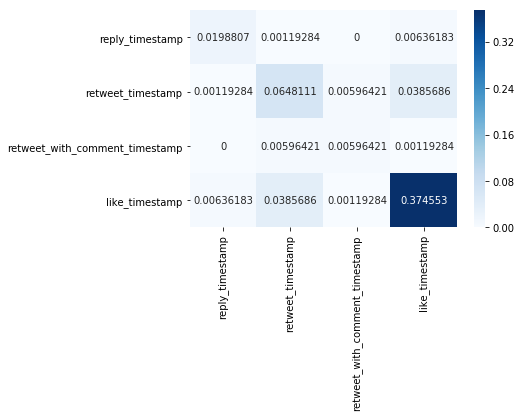

Creating Plot for  False


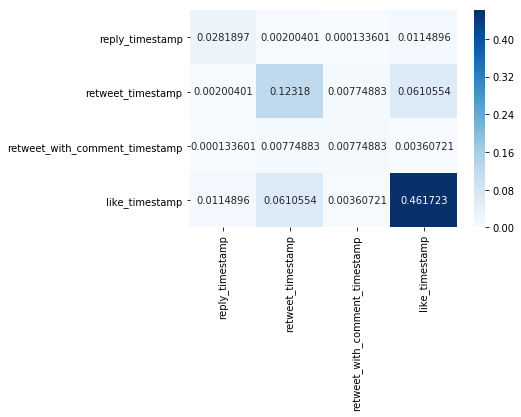

Creating plots for  enaging_user_is_verified
Creating Plot for  False


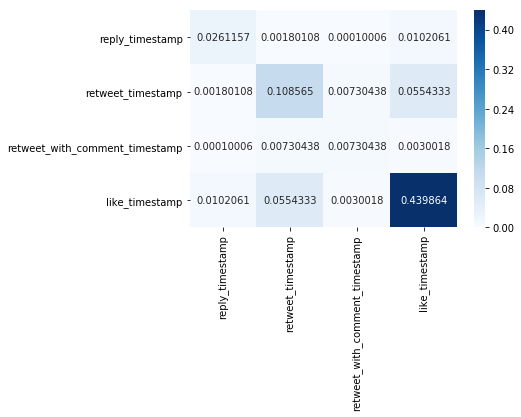

Creating Plot for  True


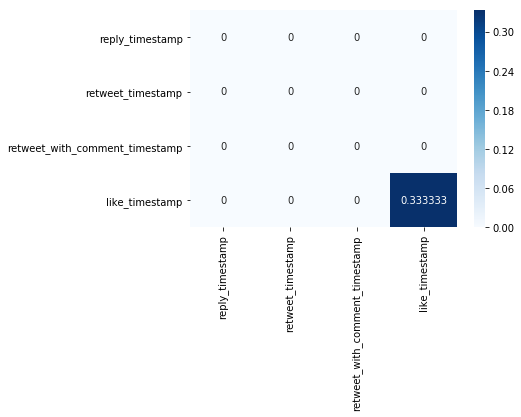

Creating plots for  engagee_follows_engager
Creating Plot for  False


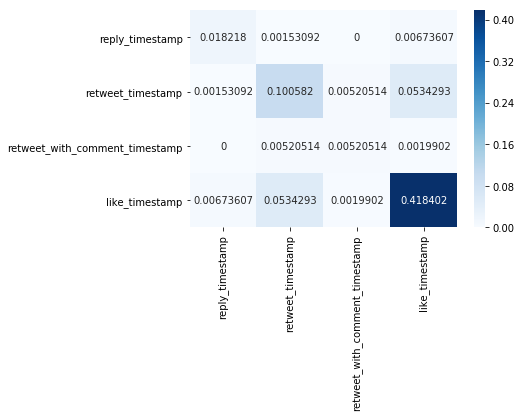

Creating Plot for  True


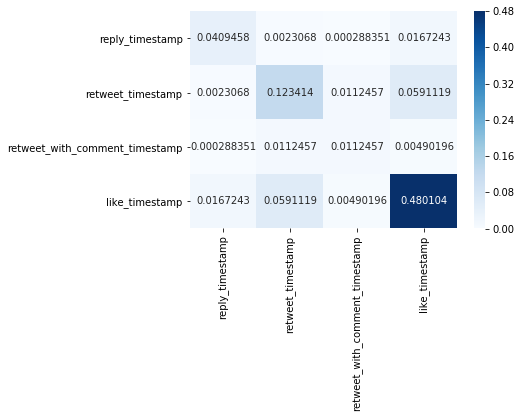

In [12]:
columns_for_statistic = ["present_media","tweet_type","language", "engaged_with_user_is_verified","enaging_user_is_verified", "engagee_follows_engager"]

for column in columns_for_statistic:
    print('Creating plots for ',column)
    sample_no_nan_column=dataset
    sample_no_nan_column[column].fillna("NaN",inplace=True)
    plot_statistic(run_statistic(sample_no_nan_column,column))

In [13]:
sum(dataset['present_media']==None)

0

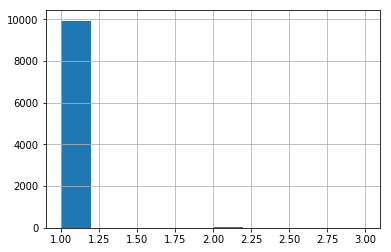

In [14]:
dataset['tweet_id'].value_counts().hist()

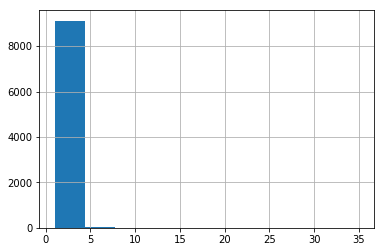

In [15]:
dataset['enaged_with_user_id'].value_counts().hist()

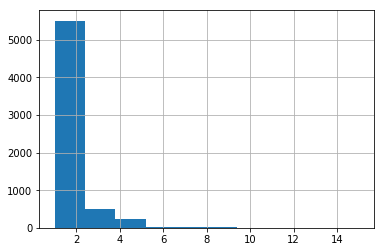

In [16]:
dataset['enaging_user_id'].value_counts().hist()

In [17]:
dataset.head(200)

text_tokens  \
0    101\t12469\t10635\t177\t171\t46714\t11850\t105...   
1    101\t1894\t47271\t11369\t82791\t39675\t34065\t...   
2    101\t1910\t26554\t38423\t11259\t12674\t25204\t...   
3    101\t14120\t131\t120\t120\t188\t119\t11170\t12...   
4    101\t1924\t111809\t18628\t11588\t11312\t1762\t...   
5    101\t8595\t4572\t10071\t3642\t1946\t2490\t1890...   
6    101\t56898\t137\t13956\t11263\t168\t34778\t258...   
7    101\t17607\t11382\t14444\t10499\t17025\t10854\...   
8    101\t11500\t10133\t10182\t29097\t10121\t11769\...   
9    101\t56898\t137\t44131\t91450\t10575\t10390\t1...   
10   101\t20977\t10245\t10105\t36304\t14039\t10135\...   
11   101\t56898\t137\t29435\t95898\t103522\t47303\t...   
12   101\t56898\t137\t10911\t55177\t21069\t11396\t1...   
13   101\t56898\t137\t28286\t168\t145\t168\t131\t12...   
14                              101\t56058\t11313\t102   
15   101\t21333\t34755\t20338\t19554\t90582\t42588\...   
16   101\t25148\t38571\t14496\t64985\t117\t100475\t...   
17   101\t32349\t11273\t11733\t14703\t93089\t12396\...   
18   101\t56898\t137\t28154\t168\t20412\t24747\t342...   
19   101\t1910\t11588\t37311\t89744\t111791\t15221\...   
20   101\t9059\t51431\t9738\t69592\t25503\t9548\t17...   
21   101\t177\t23794\t10114\t62064\t20442\t145\t114...   
22   101\t56898\t137\t38329\t25285\t13264\t11447\t5...   
23   101\t48993\t10147\t183\t32095\t10104\t190\t133...   
24   101\t56898\t137\t161\t10759\t168\t24920\t131\t...   
25   101\t100\t34415\t131\t146\t27874\t10261\t10393...   
26   101\t14518\t24250\t10149\t30187\t10343\t10149\...   
27   101\t78749\t24769\t10126\t12637\t30000\t15558\...   
28   101\t56898\t137\t95190\t98556\t19804\t10113\t1...   
29   101\t15127\t10151\t50536\t11195\t117\t10220\t9...   
..                                                 ...   
170  101\t86051\t12078\t10549\t20546\t169\t123\t115...   
171  101\t82476\t11395\t13605\t10153\t47501\t119\t1...   
172  101\t56898\t137\t10488\t10570\t10686\t55584\t1...   
173  101\t56898\t137\t12083\t11490\t10291\t19029\t4...   
174  101\t46242\t40751\t161\t100062\t10107\t10114\t...   
175  101\t56898\t137\t12132\t11281\t65798\t20591\t1...   
176  101\t108\t11317\t10731\t21698\t119\t108\t150\t...   
177  101\t100\t119\t119\t119\t119\t8458\t100\t119\t...   
178  101\t111\t43900\t132\t118\t118\t118\t118\t118\...   
179  101\t100\t14120\t131\t120\t120\t188\t119\t1117...   
180            101\t189\t21873\t10588\t10112\t189\t102   
181  101\t56898\t137\t46912\t43971\t21315\t131\t139...   
182  101\t56898\t137\t20698\t59155\t10113\t11274\t1...   
183  101\t56898\t137\t10554\t12177\t11281\t44086\t1...   
184  101\t18116\t26986\t10381\t12132\t14753\t21083\...   
185  101\t56898\t137\t187\t11396\t10115\t131\t29091...   
186  101\t22800\t15127\t15198\t14010\t106\t12034\t1...   
187  101\t56898\t137\t81582\t11703\t20024\t131\t190...   
188  101\t1892\t6667\t1906\t3832\t11592\t67946\t189...   
189  101\t19090\t10114\t10105\t175\t16889\t18745\t1...   
190  101\t56898\t137\t168\t87641\t12818\t11631\t131...   
191  101\t37670\t11951\t10950\t12953\t169\t16205\t1...   
192  101\t100\t17160\t117\t146\t10392\t11671\t11107...   
193  101\t56898\t137\t186\t10350\t10575\t10410\t131...   
194  101\t10117\t10808\t27570\t23616\t10114\t169\t1...   
195  101\t6621\t2534\t1980\t3197\t6977\t2108\t1940\...   
196  101\t56898\t137\t59948\t11273\t11274\t21838\t1...   
197  101\t56898\t137\t42169\t11855\t27561\t13331\t1...   
198  101\t56898\t137\t30665\t16119\t11396\t44026\t7...   
199  101\t56898\t137\t14988\t11127\t69006\t10113\t1...   

                                              hashtags  \
0                                                  NaN   
1    A3D61C03DBCE2F920350379414E0048B\t867E9AB76EFF...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
5                                                  NaN   
6                                       